# Homework 5
### ASTROINFORMATICS

https://github.com/astromundus/astroinfo2018/homeworks/HW5.ipynb


## Problem

Below in the notebook is the code that generates Figure 10.17 in the textbook. As it is now, it:
* downloads a dataset of variable stars collected with the [LINEAR](https://en.wikipedia.org/wiki/Lincoln_Near-Earth_Asteroid_Research) telescope,
* selects six of them (as given by the `ids` variable),
* computes the Lomb-Scargle periodogram in the `compute_best_frequencies` function,
* finds the best frequency by looking for the highest peak in the periodiogram, and
* folds the light curves and plots the results.

Either by modifying the code below, or by writing similar code, do the following:

1. Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in `data.ids[:100]`, where `data` is the variable containing the LINEAR dataset as defined below).

2. Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range $0 < T < 25$ hours. What do you observe in the histogram?

3. Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectivelly. Comment on (dis)similarities of the two plots and of stars within each plot.

4. EXTRA CREDIT: compute the histogram in #2 for ALL (about 7000) stars in the data set, not just the first 100 (note: this will take a while - on a Mac Pro about 5 hours). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data. Comment on differences compared to the 100-star case. Extra credit 20% of this homework! 

In [5]:
# Figure 10.17 code

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample
from matplotlib import gridspec
from itertools import product
import random
import numpy as np
import peakutils

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Compute the best frequencies
#@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for %i (%i points)" % (i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        
        results[i] = [omega, power]
        
    return results

In [14]:
# Load the dataset
data = fetch_LINEAR_sample()
ids = data.ids[:100]
results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

 - computing power for 10003298 (196 points)
 - computing power for 10004892 (269 points)
 - computing power for 10013411 (170 points)
 - computing power for 10021274 (214 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 10028253 (38 points)
 - computing power for 10030349 (255 points)
 - computing power for 10032668 (193 points)
 - computing power for 10038903 (227 points)
 - computing power for 10040133 (257 points)
 - computing power for 10040491 (228 points)
 - computing power for 10045187 (229 points)
 - computing power for 10045615 (101 points)
 - computing power for 10046720 (136 points)
 - computing power for 10047498 (221 points)
 - computing power for 1004849 (607 points)
 - computing power for 1005497 (607 points)
 - computing power for 10064356 (291 points)
 - computing power for 10066464 (274 points)
 - computing power for 10071455 (269 points)
 - computing power for 10084768 (388 points)
 - computing 

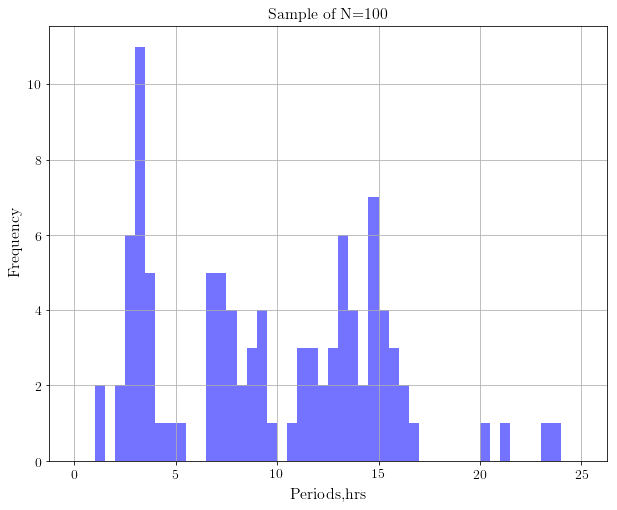

In [222]:
omega_best1=[]
period_best1=[]
for i in range(len(ids)):
    t, y, dy = data[ids[i]].T
    omega, power = results[ids[i]]
    omega_best0 = omega[np.argmax(power)] #define best frequency
    period_best0=2 * np.pi / omega_best0 * 24. #define best period, in hrs
    #To save best_omega values and best_period values outside the loop as arrays
    omega_best1.append(omega_best0)
    omega_best=np.hstack(omega_best1)
    period_best1.append(period_best0) 
    period_best=np.hstack(period_best1) 

hist_1, bin_edges_1 = np.histogram(period_best1, bins=50, range=(0,25), density=False) 
plt.subplots(figsize=(10,8))
plt.hist(period_best, bins=50, range=(0,25),facecolor='blue', alpha=0.55)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Periods, hrs',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Sample of N=100', size=16)
plt.grid(True)

From the claculated histogram it is obvious that we have multimodal distribution with three peaks (three clusters): first one is areound T=3 hrs, second one is around T=7 hrs, and third one is around T= 15 hrs. Therefore, we can assume that in the chosen sample of 100 stars there are three different types (subtypes) of variable stars. We can also clearly see that there are more stars having lower period values compared to those whose periods are close to one day.

Note: As a frequency here that is y-axis on both histograms I mean the number of stars having certain period values.

In [183]:
indexes=peakutils.indexes(hist_1, thres=0.02/max(hist_1), min_dist=2) #find indexes of the histogram peaks in the hist_1 array
data_1 = hist_1[peakutils.indexes(hist_1, thres=0.02/max(hist_1), min_dist=2)] #match peak indexes and histogram values
peak1=np.max(data_1) #find value of the first highest histogram peak
data_2=np.array([x for x in data_1  if x != peak1])
peak2=np.max(data_2) #find value of the second highest histogram peak
position_index_1=indexes[np.where(data_1 == peak1)] #find the index of the first highest peak
position_index_2=indexes[np.where(data_1 == peak2)] #finf the index of the second highest peak

#Select bin corresponding to thehighest value and few surrounding bins
edge_11=bin_edges_1[position_index_1-2]
edge_12=bin_edges_1[position_index_1+3]
edge_21=bin_edges_1[position_index_2-2]
edge_22=bin_edges_1[position_index_2+3]

#Find ids indexes corresponding to the first and second highest peaks and to select from them 
#randomly 6 stars

values_01=np.where(np.logical_and(period_best>edge_11,period_best<edge_12))
num_to_select = 6  # set the number to select here.
ids061=ids[values_01]
ids061=ids061.tolist()
num_to_select = 6  # set the number to select here.
ids61 = np.array(random.sample(ids061, num_to_select))

values_02=np.where(np.logical_and(period_best>edge_21,period_best<edge_22))
num_to_select = 6  # set the number to select here.
ids062=ids[values_02]
ids062=ids062.tolist()
ids62 = np.array(random.sample(ids062, num_to_select))

 - computing power for 10178648 (112 points)
 - computing power for 10099492 (214 points)
 - computing power for 10164624 (252 points)
 - computing power for 10102166 (213 points)
 - computing power for 10337573 (181 points)
 - computing power for 10195209 (216 points)


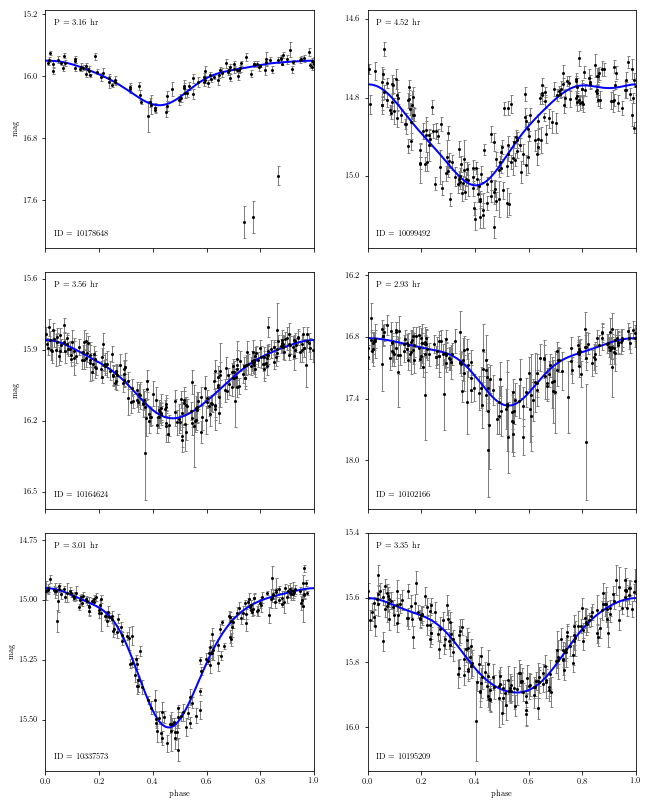

In [191]:
def plot_lightcurves1(results61, ids61):
    fig1 = plt.figure(figsize=(10, 12))
    fig1.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)
    for i in range(len(ids6)):
        # get the data and best-fit angular frequency
    
        t_1, y_1, dy_1 = data[ids61[i]].T
        omega_1, power_1 = results[ids61[i]]
        
        omega_best_1h = omega_1[np.argmax(power_1)]

        # do a fit to the first 4 Fourier components
        mtf_1h = MultiTermFit(omega_best_1h, 4)
        mtf_1h.fit(t_1, y_1, dy_1)
        phase_fit_1h, y_fit_1h, phased_t_1h = mtf_1h.predict(1000, return_phased_times=True)
    
        ax1 = fig1.add_subplot(321 + i)
        ax1.errorbar(phased_t_1h,y_1, dy_1, fmt='.k', ecolor='gray',
        lw=1, ms=4, capsize=1.5) 
        ax1.plot(phase_fit_1h, y_fit_1h, '-b', lw=2)            
        ax1.set_xlim(0, 1)
        ax1.set_ylim(plt.ylim()[::-1])
        ax1.yaxis.set_major_locator(plt.MaxNLocator(4))  
        ax1.text(0.03, 0.04, "ID = %i" % ids61[i], ha='left', va='bottom', 
                transform=ax1.transAxes)
        ax1.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best_1h * 24.),
        ha='left', va='top',transform=ax1.transAxes)   
        ylim1 = ax1.get_ylim()
        ax1.set_ylim(ylim1[0], ylim1[0] + 1.1 * (ylim1[1] - ylim1[0]))
        if i < 4:
            ax1.xaxis.set_major_formatter(plt.NullFormatter())
        if i % 2 == 0:
            ax1.set_ylabel('mag')
        if i in (4, 5):
            ax1.set_xlabel('phase')      
    return fig1

results61 = compute_best_frequencies(ids61, n_eval=10000, n_retry=5)
myprettyplot61 = plot_lightcurves1(results61, ids61)

 - computing power for 1032186 (140 points)
 - computing power for 10241512 (204 points)
 - computing power for 10337889 (172 points)
 - computing power for 10089441 (219 points)
 - computing power for 10321095 (443 points)
 - computing power for 1014960 (166 points)


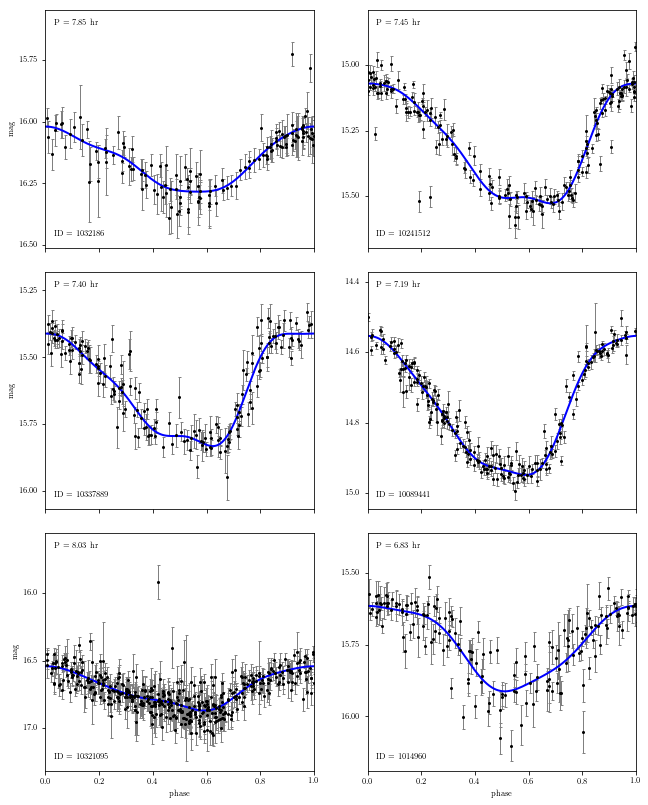

In [192]:
def plot_lightcurves2(results62, ids62):
    fig2 = plt.figure(figsize=(10, 12))
    fig2.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)
    for i in range(len(ids62)):
        # get the data and best-fit angular frequency
    
        t_2, y_2, dy_2 = data[ids62[i]].T
        omega_2, power_2 = results62[ids62[i]]
        
        omega_best_2h = omega_2[np.argmax(power_2)]

        # do a fit to the first 4 Fourier components
        mtf_2h = MultiTermFit(omega_best_2h, 4)
        mtf_2h.fit(t_2, y_2, dy_2)
        phase_fit_2h, y_fit_2h, phased_t_2h = mtf_2h.predict(1000, return_phased_times=True)
    
        ax2 = fig2.add_subplot(321 + i)
        ax2.errorbar(phased_t_2h,y_2, dy_2, fmt='.k', ecolor='gray',
        lw=1, ms=4, capsize=1.5) 
        ax2.plot(phase_fit_2h, y_fit_2h, '-b', lw=2)            
        ax2.set_xlim(0, 1)
        ax2.set_ylim(plt.ylim()[::-1])
        ax2.yaxis.set_major_locator(plt.MaxNLocator(4))  
        ax2.text(0.03, 0.04, "ID = %i" % ids62[i], ha='left', va='bottom', 
                transform=ax2.transAxes)
        ax2.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best_2h * 24.),
        ha='left', va='top',transform=ax2.transAxes)   
        ylim1 = ax2.get_ylim()
        ax2.set_ylim(ylim1[0], ylim1[0] + 1.1 * (ylim1[1] - ylim1[0]))
        if i < 4:
            ax2.xaxis.set_major_formatter(plt.NullFormatter())
        if i % 2 == 0:
            ax2.set_ylabel('mag')
        if i in (4, 5):
            ax2.set_xlabel('phase')       
      
    return fig2

results62 = compute_best_frequencies(ids62, n_eval=10000, n_retry=5)
myprettyplot62 = plot_lightcurves2(results62, ids62)

As we can see from the figures for stars for the highest peak and second highest peak, there are some differences. Firstly, we have broader wings of the fit lines for the second peak that is obvious since it is coming from that the second highest peak corresponds to the larger period values. On the figure generated for variables from the first highest peak we have more sinusoidal, symmetric line shape while on the figure generated from the second highest peak the lightcurve has certain skewness that means more rapid decrease/increase (depending on the skewness direction) in brightness. These features observed in lightcurves allow us to distinguish between such variable stars as RR Lyrae and Cepheids that generally negative (left) skewness or no skewness at all and eclipsing binaries. Thus, looking at the figures we can make an assumption that subsample taken from the second highest histogram peak mostly consists of variable stars type RR Lyrae since there is clearly detectable skewness in lightcurves and typical for RR Lyrae stars two local minima at the lowest brightness. The first subsample, probably, consists of eclipsing binary stars since their lightcurve shapes looks like Gaussian profile that is typical for eclipsing binaries. 

There are also some variances in the lightcurve shapes within each subsamples consisting of 6 stars that are mainly corresponds to slight differences in the changes in the variable brightness.

In [ ]:
# Load all dataset
data_7= fetch_LINEAR_sample()
ids_7= data_7.ids
results_7= compute_best_frequencies(ids_7, n_eval=10000, n_retry=5)

 - computing power for 10003298 (196 points)
 - computing power for 10004892 (269 points)
 - computing power for 10013411 (170 points)
 - computing power for 10021274 (214 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 10028253 (38 points)
 - computing power for 10030349 (255 points)
 - computing power for 10032668 (193 points)
 - computing power for 10038903 (227 points)
 - computing power for 10040133 (257 points)
 - computing power for 10040491 (228 points)
 - computing power for 10045187 (229 points)
 - computing power for 10045615 (101 points)
 - computing power for 10046720 (136 points)
 - computing power for 10047498 (221 points)
 - computing power for 1004849 (607 points)
 - computing power for 1005497 (607 points)
 - computing power for 10064356 (291 points)
 - computing power for 10066464 (274 points)
 - computing power for 10071455 (269 points)
 - computing power for 10084768 (388 points)
 - computing 

 - computing power for 10609185 (424 points)
 - computing power for 10614690 (221 points)
 - computing power for 10617428 (203 points)
 - computing power for 10619285 (218 points)
 - computing power for 10623386 (385 points)
 - computing power for 10628913 (345 points)
 - computing power for 10634459 (203 points)
 - computing power for 10642127 (210 points)
 - computing power for 10647040 (383 points)
 - computing power for 10648348 (213 points)
 - computing power for 10650256 (165 points)
 - computing power for 10655343 (240 points)
 - computing power for 10655742 (270 points)
 - computing power for 10660789 (237 points)
 - computing power for 10662289 (262 points)
 - computing power for 10662468 (301 points)
 - computing power for 10664456 (342 points)
 - computing power for 1066477 (147 points)
 - computing power for 10671227 (278 points)
 - computing power for 10676064 (319 points)
 - computing power for 10680443 (142 points)
 - computing power for 10689075 (208 points)
 - computin

 - computing power for 11178050 (215 points)
 - computing power for 11187857 (343 points)
 - computing power for 11202454 (218 points)
 - computing power for 11206727 (253 points)
 - computing power for 11212840 (336 points)
 - computing power for 11214551 (276 points)
 - computing power for 11215595 (338 points)
 - computing power for 1122328 (536 points)
 - computing power for 11224124 (318 points)
 - computing power for 11231236 (146 points)
 - computing power for 11233410 (183 points)
 - computing power for 11236739 (148 points)
 - computing power for 11238522 (147 points)
 - computing power for 1124773 (169 points)
 - computing power for 11248827 (205 points)
 - computing power for 11250867 (182 points)
 - computing power for 11256803 (251 points)
 - computing power for 11265995 (232 points)
 - computing power for 11266154 (249 points)
 - computing power for 11266259 (244 points)
 - computing power for 11266421 (241 points)
 - computing power for 1126681 (187 points)
 - computing 

 - computing power for 11863356 (249 points)
 - computing power for 11864180 (236 points)
 - computing power for 11864369 (243 points)
 - computing power for 11864431 (219 points)
 - computing power for 11866538 (265 points)
 - computing power for 11870305 (76 points)
 - computing power for 11872511 (205 points)
 - computing power for 11882477 (198 points)
 - computing power for 11896841 (208 points)
 - computing power for 1190208 (289 points)
 - computing power for 11905739 (206 points)
 - computing power for 11912411 (192 points)
 - computing power for 11917874 (219 points)
 - computing power for 11922992 (193 points)
 - computing power for 11925135 (228 points)
 - computing power for 11929402 (209 points)
 - computing power for 11932308 (243 points)
 - computing power for 11934810 (231 points)
 - computing power for 11935712 (61 points)
 - computing power for 11936793 (231 points)
 - computing power for 11937119 (207 points)
 - computing power for 11942032 (203 points)
 - computing 

 - computing power for 12504572 (404 points)
 - computing power for 12504832 (219 points)
 - computing power for 12505068 (206 points)
 - computing power for 12508478 (213 points)
 - computing power for 12516209 (231 points)
 - computing power for 12517171 (220 points)
 - computing power for 12518025 (195 points)
 - computing power for 12525125 (235 points)
 - computing power for 12526629 (196 points)
 - computing power for 12533027 (167 points)
 - computing power for 12534878 (234 points)
 - computing power for 12536474 (205 points)
 - computing power for 12544799 (161 points)
 - computing power for 12560639 (192 points)
 - computing power for 12561269 (209 points)
 - computing power for 12562559 (219 points)
 - computing power for 12565297 (201 points)
 - computing power for 12566108 (219 points)
 - computing power for 12569794 (193 points)
 - computing power for 12571908 (196 points)
 - computing power for 12578804 (218 points)
 - computing power for 1258617 (259 points)
 - computin

 - computing power for 13077277 (256 points)
 - computing power for 1307948 (262 points)
 - computing power for 1308565 (262 points)
 - computing power for 13087122 (245 points)
 - computing power for 13088404 (258 points)
 - computing power for 13089931 (259 points)
 - computing power for 13093137 (247 points)
 - computing power for 13095415 (254 points)
 - computing power for 13102760 (299 points)
 - computing power for 13103579 (233 points)
 - computing power for 13104605 (275 points)
 - computing power for 13109299 (265 points)
 - computing power for 13112616 (387 points)
 - computing power for 13112627 (239 points)
 - computing power for 13116521 (204 points)
 - computing power for 13119720 (256 points)
 - computing power for 13127606 (205 points)
 - computing power for 13134888 (110 points)
 - computing power for 13135923 (190 points)
 - computing power for 13139150 (127 points)
 - computing power for 13141670 (190 points)
 - computing power for 13142102 (178 points)
 - computing

 - computing power for 13714791 (146 points)
 - computing power for 13715740 (212 points)
 - computing power for 13716218 (103 points)
 - computing power for 13716339 (178 points)
 - computing power for 13716945 (133 points)
 - computing power for 13719041 (196 points)
 - computing power for 1372405 (181 points)
 - computing power for 13732238 (196 points)
 - computing power for 13733154 (212 points)
 - computing power for 13740532 (192 points)
 - computing power for 13740631 (191 points)
 - computing power for 13748458 (175 points)
 - computing power for 1374889 (189 points)
 - computing power for 13752690 (186 points)
 - computing power for 13755234 (201 points)
 - computing power for 13782315 (235 points)
 - computing power for 13789361 (229 points)
 - computing power for 13796841 (179 points)
 - computing power for 13801112 (234 points)
 - computing power for 13803333 (214 points)
 - computing power for 13803688 (177 points)
 - computing power for 13803795 (200 points)
 - computing

 - computing power for 14355066 (249 points)
 - computing power for 14355535 (203 points)
 - computing power for 14358703 (98 points)
 - computing power for 14361000 (254 points)
 - computing power for 14363418 (136 points)
 - computing power for 14372428 (214 points)
 - computing power for 14372790 (235 points)
 - computing power for 14374443 (196 points)
 - computing power for 14384380 (196 points)
 - computing power for 14385018 (192 points)
 - computing power for 14385053 (91 points)
 - computing power for 1438520 (523 points)
 - computing power for 14388219 (232 points)
 - computing power for 14391509 (202 points)
 - computing power for 14392530 (195 points)
 - computing power for 14396814 (205 points)
 - computing power for 14398096 (183 points)
 - computing power for 14400528 (167 points)
 - computing power for 14401783 (191 points)
 - computing power for 1440217 (574 points)
 - computing power for 14402591 (200 points)
 - computing power for 14404377 (212 points)
 - computing p

 - computing power for 14872363 (197 points)
 - computing power for 14879326 (208 points)
 - computing power for 14882819 (206 points)
 - computing power for 14891009 (175 points)
 - computing power for 14892476 (70 points)
 - computing power for 14900115 (218 points)
 - computing power for 14900693 (201 points)
 - computing power for 1490274 (314 points)
 - computing power for 14902930 (203 points)
 - computing power for 14903357 (215 points)
 - computing power for 14907569 (189 points)
 - computing power for 14910000 (206 points)
 - computing power for 14911095 (189 points)
 - computing power for 1491155 (323 points)
 - computing power for 14914913 (91 points)
 - computing power for 14915173 (162 points)
 - computing power for 1491775 (293 points)
 - computing power for 14918387 (245 points)
 - computing power for 1491942 (331 points)
 - computing power for 14920151 (192 points)
 - computing power for 1492054 (339 points)
 - computing power for 14921022 (202 points)
 - computing powe

 - computing power for 15271443 (205 points)
 - computing power for 15281799 (205 points)
 - computing power for 15282342 (156 points)
 - computing power for 15283871 (161 points)
 - computing power for 15284007 (194 points)
 - computing power for 15284973 (192 points)
 - computing power for 15286656 (143 points)
 - computing power for 15287382 (165 points)
 - computing power for 15288375 (160 points)
 - computing power for 15289202 (162 points)
 - computing power for 15289666 (205 points)
 - computing power for 15290674 (184 points)
 - computing power for 15291490 (207 points)
 - computing power for 15293674 (187 points)
 - computing power for 15297171 (179 points)
 - computing power for 15299709 (30 points)
 - computing power for 15302470 (179 points)
 - computing power for 15309363 (159 points)
 - computing power for 15310004 (194 points)
 - computing power for 15317298 (190 points)
 - computing power for 15317421 (195 points)
 - computing power for 15322165 (202 points)
 - computin

 - computing power for 15724616 (209 points)
 - computing power for 15728324 (233 points)
 - computing power for 15732634 (167 points)
 - computing power for 15739880 (231 points)
 - computing power for 15744353 (237 points)
 - computing power for 15748224 (230 points)
 - computing power for 15748251 (230 points)
 - computing power for 15751544 (236 points)
 - computing power for 15756106 (167 points)
 - computing power for 15761861 (184 points)
 - computing power for 15769416 (198 points)
 - computing power for 15777228 (177 points)
 - computing power for 15779995 (202 points)
 - computing power for 15780274 (208 points)
 - computing power for 15780904 (166 points)
 - computing power for 15781893 (180 points)
 - computing power for 15782719 (158 points)
 - computing power for 15784483 (155 points)
 - computing power for 15785272 (195 points)
 - computing power for 15786114 (193 points)
 - computing power for 15795553 (313 points)
 - computing power for 15796684 (153 points)
 - computi

 - computing power for 16243512 (171 points)
 - computing power for 16250908 (114 points)
 - computing power for 16251897 (205 points)
 - computing power for 16258664 (213 points)
 - computing power for 16259674 (179 points)
 - computing power for 1626282 (307 points)
 - computing power for 16264955 (220 points)
 - computing power for 16268086 (230 points)
 - computing power for 16275275 (203 points)
 - computing power for 1627564 (317 points)
 - computing power for 16277405 (227 points)
 - computing power for 16277791 (218 points)
 - computing power for 16279008 (195 points)
 - computing power for 16282896 (221 points)
 - computing power for 16283036 (198 points)
 - computing power for 16285874 (201 points)
 - computing power for 16287123 (154 points)
 - computing power for 16288747 (232 points)
 - computing power for 16291191 (204 points)
 - computing power for 16291550 (159 points)
 - computing power for 16294364 (171 points)
 - computing power for 16294827 (203 points)
 - computing

 - computing power for 1667598 (555 points)
 - computing power for 16680023 (210 points)
 - computing power for 16680195 (210 points)
 - computing power for 16684220 (210 points)
 - computing power for 16692577 (215 points)
 - computing power for 16694484 (142 points)
 - computing power for 16703174 (219 points)
 - computing power for 16703794 (176 points)
 - computing power for 16704626 (208 points)
 - computing power for 16705362 (200 points)
 - computing power for 16707409 (213 points)
 - computing power for 16710177 (209 points)
 - computing power for 16714704 (239 points)
 - computing power for 16715726 (208 points)
 - computing power for 16718769 (204 points)
 - computing power for 16719500 (199 points)
 - computing power for 16726633 (196 points)
 - computing power for 16728832 (198 points)
 - computing power for 16730714 (214 points)
 - computing power for 16732110 (222 points)
 - computing power for 16733767 (232 points)
 - computing power for 16733833 (204 points)
 - computin

 - computing power for 1735658 (547 points)
 - computing power for 17359449 (272 points)
 - computing power for 1736308 (372 points)
 - computing power for 17370336 (526 points)
 - computing power for 17373195 (504 points)
 - computing power for 17386926 (266 points)
 - computing power for 17388305 (241 points)
 - computing power for 17389083 (207 points)
 - computing power for 17403485 (185 points)
 - computing power for 17404363 (194 points)
 - computing power for 17413648 (161 points)
 - computing power for 17418926 (195 points)
 - computing power for 17419718 (209 points)
 - computing power for 17429661 (218 points)
 - computing power for 17433084 (515 points)
 - computing power for 1743519 (167 points)
 - computing power for 17436807 (496 points)
 - computing power for 174389 (270 points)
 - computing power for 17444609 (489 points)
 - computing power for 17452152 (549 points)
 - computing power for 1746311 (226 points)
 - computing power for 17463281 (550 points)
 - computing pow

 - computing power for 18001324 (215 points)
 - computing power for 18003132 (221 points)
 - computing power for 18003140 (220 points)
 - computing power for 18006468 (165 points)
 - computing power for 18008609 (199 points)
 - computing power for 18010252 (219 points)
 - computing power for 18011727 (219 points)
 - computing power for 18020442 (222 points)
 - computing power for 18020957 (371 points)
 - computing power for 18021143 (241 points)
 - computing power for 18024182 (185 points)
 - computing power for 18028053 (147 points)
 - computing power for 18029577 (141 points)
 - computing power for 18029924 (232 points)
 - computing power for 18032651 (180 points)
 - computing power for 18032723 (211 points)
 - computing power for 18034228 (217 points)
 - computing power for 18034354 (227 points)
 - computing power for 18038442 (245 points)
 - computing power for 18040121 (224 points)
 - computing power for 18040499 (240 points)
 - computing power for 18040815 (227 points)
 - computi

 - computing power for 18508280 (199 points)
 - computing power for 18510465 (188 points)
 - computing power for 18512447 (177 points)
 - computing power for 1851295 (317 points)
 - computing power for 18514233 (162 points)
 - computing power for 18515114 (116 points)
 - computing power for 18516711 (126 points)
 - computing power for 18517769 (67 points)
 - computing power for 18524508 (219 points)
 - computing power for 18525697 (211 points)
 - computing power for 1852714 (294 points)
 - computing power for 18527462 (185 points)
 - computing power for 18527878 (215 points)
 - computing power for 18533525 (214 points)
 - computing power for 18535998 (217 points)
 - computing power for 18536264 (185 points)
 - computing power for 18537828 (214 points)
 - computing power for 18541863 (151 points)
 - computing power for 18543464 (202 points)
 - computing power for 18545645 (144 points)
 - computing power for 18554616 (193 points)
 - computing power for 18557434 (190 points)
 - computing 

 - computing power for 18997169 (189 points)
 - computing power for 18997392 (203 points)
 - computing power for 19003918 (183 points)
 - computing power for 19006702 (182 points)
 - computing power for 19008047 (180 points)
 - computing power for 19008895 (167 points)
 - computing power for 19012211 (190 points)
 - computing power for 19013715 (215 points)
 - computing power for 19013854 (183 points)
 - computing power for 190201 (44 points)
 - computing power for 19022038 (216 points)
 - computing power for 19024518 (199 points)
 - computing power for 19029359 (211 points)
 - computing power for 19030478 (198 points)
 - computing power for 19030974 (198 points)
 - computing power for 19031733 (206 points)
 - computing power for 19033183 (202 points)
 - computing power for 19036607 (184 points)
 - computing power for 19038039 (204 points)
 - computing power for 19038609 (79 points)
 - computing power for 19043737 (127 points)
 - computing power for 19049888 (224 points)
 - computing p

 - computing power for 19621282 (188 points)
 - computing power for 19624049 (207 points)
 - computing power for 19630958 (155 points)
 - computing power for 19644291 (207 points)
 - computing power for 19647392 (182 points)
 - computing power for 19648541 (312 points)
 - computing power for 19655048 (221 points)
 - computing power for 19661763 (219 points)
 - computing power for 19668062 (208 points)
 - computing power for 19670874 (161 points)
 - computing power for 19674074 (145 points)
 - computing power for 19675641 (148 points)
 - computing power for 19676971 (202 points)
 - computing power for 19683023 (218 points)
 - computing power for 19686866 (207 points)
 - computing power for 1968997 (260 points)
 - computing power for 19692246 (186 points)
 - computing power for 19695942 (176 points)
 - computing power for 19699379 (204 points)
 - computing power for 1970100 (250 points)
 - computing power for 19702093 (201 points)
 - computing power for 19707725 (207 points)
 - computing

 - computing power for 20071721 (194 points)
 - computing power for 20071890 (220 points)
 - computing power for 20072583 (210 points)
 - computing power for 20072948 (257 points)
 - computing power for 20074218 (257 points)
 - computing power for 20075676 (202 points)
 - computing power for 20075891 (213 points)
 - computing power for 20079092 (256 points)
 - computing power for 20083833 (221 points)
 - computing power for 20092061 (193 points)
 - computing power for 20097614 (143 points)
 - computing power for 20098606 (205 points)
 - computing power for 20099981 (213 points)
 - computing power for 20105424 (215 points)
 - computing power for 20107944 (215 points)
 - computing power for 20121650 (193 points)
 - computing power for 20128903 (207 points)
 - computing power for 20129375 (197 points)
 - computing power for 20132306 (196 points)
 - computing power for 20148918 (176 points)
 - computing power for 2014943 (517 points)
 - computing power for 20151328 (216 points)
 - computin

 - computing power for 2079147 (459 points)
 - computing power for 20794936 (181 points)
 - computing power for 20797457 (182 points)
 - computing power for 20801328 (156 points)
 - computing power for 20804126 (181 points)
 - computing power for 20804594 (67 points)
 - computing power for 20813826 (172 points)
 - computing power for 20815762 (188 points)
 - computing power for 20822204 (185 points)
 - computing power for 20828304 (174 points)
 - computing power for 20829724 (191 points)
 - computing power for 20831083 (195 points)
 - computing power for 20833846 (191 points)
 - computing power for 20837681 (178 points)
 - computing power for 2084640 (523 points)
 - computing power for 20855130 (232 points)
 - computing power for 20858337 (219 points)
 - computing power for 20860892 (180 points)
 - computing power for 20861579 (183 points)
 - computing power for 20865430 (38 points)
 - computing power for 20865682 (220 points)
 - computing power for 20866511 (198 points)
 - computing p

 - computing power for 21460667 (441 points)
 - computing power for 21460890 (496 points)
 - computing power for 21461642 (535 points)
 - computing power for 21468901 (476 points)
 - computing power for 21473837 (606 points)
 - computing power for 21474739 (512 points)
 - computing power for 21480626 (579 points)
 - computing power for 21486032 (524 points)
 - computing power for 2148637 (339 points)
 - computing power for 21486794 (506 points)
 - computing power for 21488669 (473 points)
 - computing power for 2149181 (311 points)
 - computing power for 21492633 (457 points)
 - computing power for 21493809 (492 points)
 - computing power for 21496631 (478 points)
 - computing power for 21500886 (291 points)
 - computing power for 21505266 (290 points)
 - computing power for 21515129 (320 points)
 - computing power for 21516768 (245 points)
 - computing power for 21518140 (245 points)
 - computing power for 21526640 (506 points)
 - computing power for 21531228 (607 points)
 - computing

 - computing power for 22287451 (327 points)
 - computing power for 2229607 (290 points)
 - computing power for 2230438 (246 points)
 - computing power for 22306983 (304 points)
 - computing power for 2230712 (242 points)
 - computing power for 22309292 (302 points)
 - computing power for 22315266 (545 points)
 - computing power for 22316675 (506 points)
 - computing power for 22317507 (346 points)
 - computing power for 22318468 (527 points)
 - computing power for 22319996 (514 points)
 - computing power for 22322024 (541 points)
 - computing power for 22323193 (515 points)
 - computing power for 22323448 (542 points)
 - computing power for 22338901 (236 points)
 - computing power for 22342092 (231 points)
 - computing power for 22345256 (287 points)
 - computing power for 22346514 (309 points)
 - computing power for 22356134 (185 points)
 - computing power for 22363963 (238 points)
 - computing power for 2237746 (488 points)
 - computing power for 22378268 (298 points)
 - computing p

 - computing power for 23074578 (562 points)
 - computing power for 23076584 (550 points)
 - computing power for 23079661 (541 points)
 - computing power for 23085525 (231 points)
 - computing power for 23085978 (223 points)
 - computing power for 23086777 (258 points)
 - computing power for 23087816 (217 points)
 - computing power for 23091164 (242 points)
 - computing power for 23109894 (174 points)
 - computing power for 23119208 (190 points)
 - computing power for 23121563 (208 points)
 - computing power for 2313352 (241 points)
 - computing power for 23135759 (552 points)
 - computing power for 23140598 (177 points)
 - computing power for 23148132 (567 points)
 - computing power for 23148883 (491 points)
 - computing power for 23150330 (554 points)
 - computing power for 23157611 (453 points)
 - computing power for 23157974 (444 points)
 - computing power for 23159004 (369 points)
 - computing power for 23160643 (493 points)
 - computing power for 23163658 (431 points)
 - computin

 - computing power for 23594608 (80 points)
 - computing power for 23596342 (286 points)
 - computing power for 23598918 (315 points)
 - computing power for 23603002 (315 points)
 - computing power for 23604060 (344 points)
 - computing power for 23614288 (82 points)
 - computing power for 23614798 (84 points)
 - computing power for 23616106 (93 points)
 - computing power for 23620712 (316 points)
 - computing power for 23623155 (308 points)
 - computing power for 23624228 (295 points)
 - computing power for 23625382 (292 points)
 - computing power for 23625796 (323 points)
 - computing power for 2362884 (233 points)
 - computing power for 23630974 (88 points)
 - computing power for 23631134 (65 points)
 - computing power for 23634524 (90 points)
 - computing power for 23637760 (277 points)
 - computing power for 23639331 (261 points)
 - computing power for 23640732 (251 points)
 - computing power for 23653133 (286 points)
 - computing power for 23653629 (299 points)
 - computing power

 - computing power for 24139748 (142 points)
 - computing power for 2414841 (522 points)
 - computing power for 24151584 (516 points)
 - computing power for 24153038 (611 points)
 - computing power for 24153314 (180 points)
 - computing power for 24160323 (510 points)
 - computing power for 24163451 (36 points)
 - computing power for 24164684 (161 points)
 - computing power for 24166005 (166 points)
 - computing power for 24168237 (130 points)
 - computing power for 24170603 (521 points)
 - computing power for 24185328 (411 points)
 - computing power for 24191273 (45 points)
 - computing power for 24192071 (570 points)
 - computing power for 24192279 (596 points)
 - computing power for 2419376 (391 points)
 - computing power for 24198561 (236 points)
 - computing power for 24199965 (425 points)
 - computing power for 24203529 (453 points)
 - computing power for 24205854 (443 points)
 - computing power for 24209652 (434 points)
 - computing power for 24215207 (528 points)
 - computing p

 - computing power for 24796756 (366 points)
 - computing power for 24802462 (499 points)
 - computing power for 24810052 (483 points)
 - computing power for 24810840 (511 points)
 - computing power for 24815070 (506 points)
 - computing power for 24815579 (534 points)
 - computing power for 24815892 (489 points)
 - computing power for 24821042 (506 points)
 - computing power for 24825104 (520 points)
 - computing power for 24827687 (522 points)
 - computing power for 24830025 (465 points)
 - computing power for 24831238 (456 points)
 - computing power for 24834880 (508 points)
 - computing power for 248379 (40 points)
 - computing power for 24843959 (535 points)
 - computing power for 24846965 (512 points)
 - computing power for 24851183 (493 points)
 - computing power for 24858973 (530 points)
 - computing power for 24860724 (489 points)
 - computing power for 24866808 (519 points)
 - computing power for 24870003 (499 points)
 - computing power for 24883607 (412 points)
 - computing 

 - computing power for 2554750 (285 points)
 - computing power for 255658 (289 points)
 - computing power for 255857 (317 points)
 - computing power for 2564971 (512 points)
 - computing power for 2565858 (337 points)
 - computing power for 2566499 (366 points)
 - computing power for 2568913 (439 points)
 - computing power for 2569778 (373 points)
 - computing power for 2574370 (433 points)
 - computing power for 257977 (313 points)
 - computing power for 2581524 (300 points)
 - computing power for 2584911 (336 points)
 - computing power for 258499 (275 points)
 - computing power for 2587263 (310 points)
 - computing power for 2590360 (259 points)
 - computing power for 2593243 (307 points)
 - computing power for 2595739 (327 points)
 - computing power for 2602707 (322 points)
 - computing power for 2602711 (345 points)
 - computing power for 260620 (226 points)
 - computing power for 2609351 (294 points)
 - computing power for 2612592 (270 points)
 - computing power for 2616340 (257 p

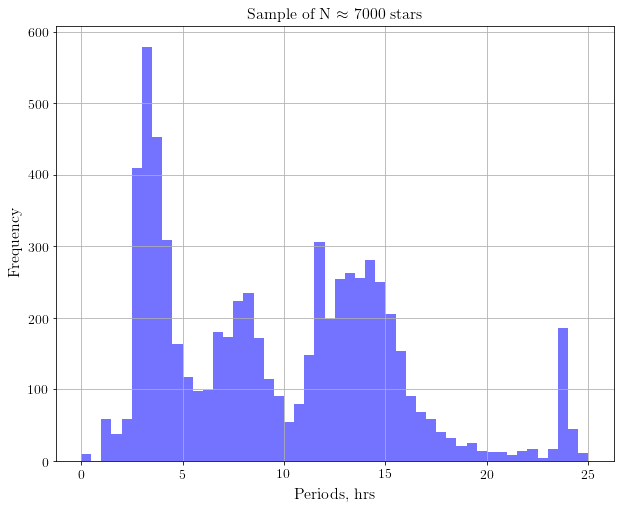

In [228]:
omega_best1_7=[]
period_best1_7=[]
for i in range(len(ids_7)):
    t_7, y_7, dy_7 = data_7[ids_7[i]].T
    omega_7, power_7 = results_7[ids_7[i]]
    omega_best0_7 = omega_7[np.argmax(power_7)]
    period_best0_7=2 * np.pi / omega_best0_7 * 24.
    omega_best1_7.append(omega_best0_7)
    omega_best_7=np.hstack(omega_best1_7)
    period_best1_7.append(period_best0_7) 
    period_best_7=np.hstack(period_best1_7)
    
hist_7, bin_edges_7 = np.histogram(period_best_7, bins=50, range=(0,25), density=False) 
plt.subplots(figsize=(10,8))
plt.hist(period_best_7, bins=50, range=(0,25),facecolor='blue', alpha=0.55)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Periods, hrs',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title(r'Sample of N $\approx$ 7000 stars', size=16)
plt.grid(True)

As we can see, the histogram calculated for the whole dataset is more uniform that dataset calculated for the sample of 100 stars: we don't have so many empty bins anymore. By the way, the main features such as the number of main peaks (obviously, we have multimodal histograms) and overall frequency distribution remains almost unchanged. However,in addition to three variable clusters observed for the sample consisting of 100 stars, it looks like in the histogram for the whole dataset an additional cluster appears at period values around 24 hrs. From both histograms we can also see that the short periodic variables dominate in the LINEAR database.